# MongoDB - Vector DB Quickstart

### 1. Install Python Dependencies

In [2]:
!pip install pymongo numpy scipy matplotlib

You should consider upgrading via the '/Users/juan.abello/.pyenv/versions/3.8.16/bin/python3.8 -m pip install --upgrade pip' command.


### 2. Get DB Connection and Create Vector DB

In [6]:
from getpass import getpass
ATLAS_CONNECTION_STRING = getpass("Please provide your connection string. Make sure to update <password> to a valid value: ")

In [7]:
from pymongo import IndexModel
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

# Create a new client and connect to the server
client = MongoClient(ATLAS_CONNECTION_STRING, server_api=ServerApi('1'))

db = client["vector_db"]

# Create a vector database
vector_db = db["vector_collection"]

### 3. Insert Documents into DB

In [8]:
# Insert documents into the vector database
documents = [
    {"name": "Alice", "vector": np.array([1, 2]).tolist()},
    {"name": "Bob", "vector": np.array([3, 4]).tolist()},
    {"name": "Carol", "vector": np.array([5, 6]).tolist()},
]

for document in documents:
    vector_db.insert_one(document)

### 4. Retrieve Documents from DB

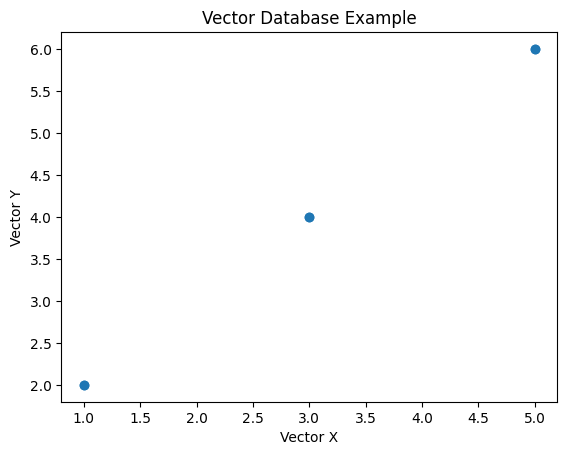

In [9]:
# Retrieve documents from the vector database
cursor = vector_db.find()
documents = [document for document in cursor]

# Perform vector operations on the documents
# Calculate the cosine similarity between Alice and Bob
cosine_similarity = spatial.distance.cosine(documents[0]["vector"], documents[1]["vector"])

# Visualize the results
plt.figure()
plt.scatter([document["vector"][0] for document in documents], [document["vector"][1] for document in documents])
plt.xlabel("Vector X")
plt.ylabel("Vector Y")
plt.title("Vector Database Example")
plt.show()

### 5. ANN Search Using the PyMongo driver

In [10]:
# Create a query vector
query_vector = np.array([1, 2])

# Calculate the cosine similarity between the query vector and all of the vectors in the database
cosine_similarities = []

for document in vector_db.find():
    cosine_similarity = spatial.distance.cosine(query_vector, document["vector"])
    cosine_similarities.append(cosine_similarity)

# Create a dictionary to map document IDs to cosine similarities
cosine_similarity_dict = {}

for i in range(len(cosine_similarities)):
    cosine_similarity_dict[vector_db.find()[i]["_id"]] = cosine_similarities[i]

# Sort the documents by cosine similarity
sorted_vectors = sorted(vector_db.find(), key=lambda document: cosine_similarity_dict[document["_id"]])

# Return the top N vectors from the list
top_n_vectors = sorted_vectors[:10]

# Print the top N vectors
for i,vector in enumerate(top_n_vectors):
    print(f"{i+1}. {vector['vector']}")

1. [1, 2]
2. [1, 2]
3. [3, 4]
4. [3, 4]
5. [5, 6]
6. [5, 6]


### 6. ANN Search Using a Vector Search Index

In [11]:
# Create a query vector
query_vector = np.array([1, 2])

# Perform a vector search
results = vector_db.find({"vector": {"knnBeta": query_vector.tolist()}})

# Print the results
for result in results:
    print(result["vector"])